In [6]:
get_ipython().magic('matplotlib notebook')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
import copy as cp

#+____IMPORT FESOM RELATET ROUTINES____________________________________________+
from set_inputarray  import *
from sub_fesom_mesh  import * 
from sub_fesom_data  import * 
from sub_fesom_plot  import *
from sub_climatology  import *
from colormap_c2c    import *
from sub_regriding_adapt import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** LOAD FVSOM MESH ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
# for more options look in set_inputarray.py
inputarray=set_inputarray()
inputarray['save_fig'        ] = False
inputarray['save_figpath'    ] = '/home/ollie/pscholz/figures/poster_TRR181_winterschool/'
    
# set plot box for cyl projection (default: [-180,180,-90,90])
#inputarray['which_box'] = [0,360,-90,90] ; inputarray['mesh_focus']=180
inputarray['which_box'] = [-180,180,-90,90]
#inputarray['which_box'] = [-90,35,20,85]
#inputarray['which_box'] = [-180,180,35,90]
#inputarray['which_box'] = [-180,180,-90,-50]

# set projection variable --> the lon/lat projection plot ranges are set via 
# inputarray['which_box'] = [lonmin,lonmax,latmin,latmax]
inputarray['proj'     ] = 'cyl' # 'ortho', 'cyl', 'npstere' , 'spstere'
inputarray['proj_lon' ] = -45 #only for ortho
inputarray['proj_lat' ] = 45 #only for ortho

inputarray['mesh_id'		 ] = 'COREv2'
#inputarray['mesh_dir'		 ] = '/work/ollie/pscholz/mesh_fesom2.0/mesh_CORE2_final/'
inputarray['mesh_dir'		 ] = '/work/ollie/pscholz/mesh_fesom2.0/mesh_CORE2_dsidorenko_meanval/'
try:
	mesh
except NameError:
	mesh = fesom_init_mesh(inputarray)
else:
	print(" --> ___FOUND FESOM MESH --> will use it!___________________________")

 --> ___FOUND FESOM MESH --> will use it!___________________________


<IPython.core.display.Javascript object>


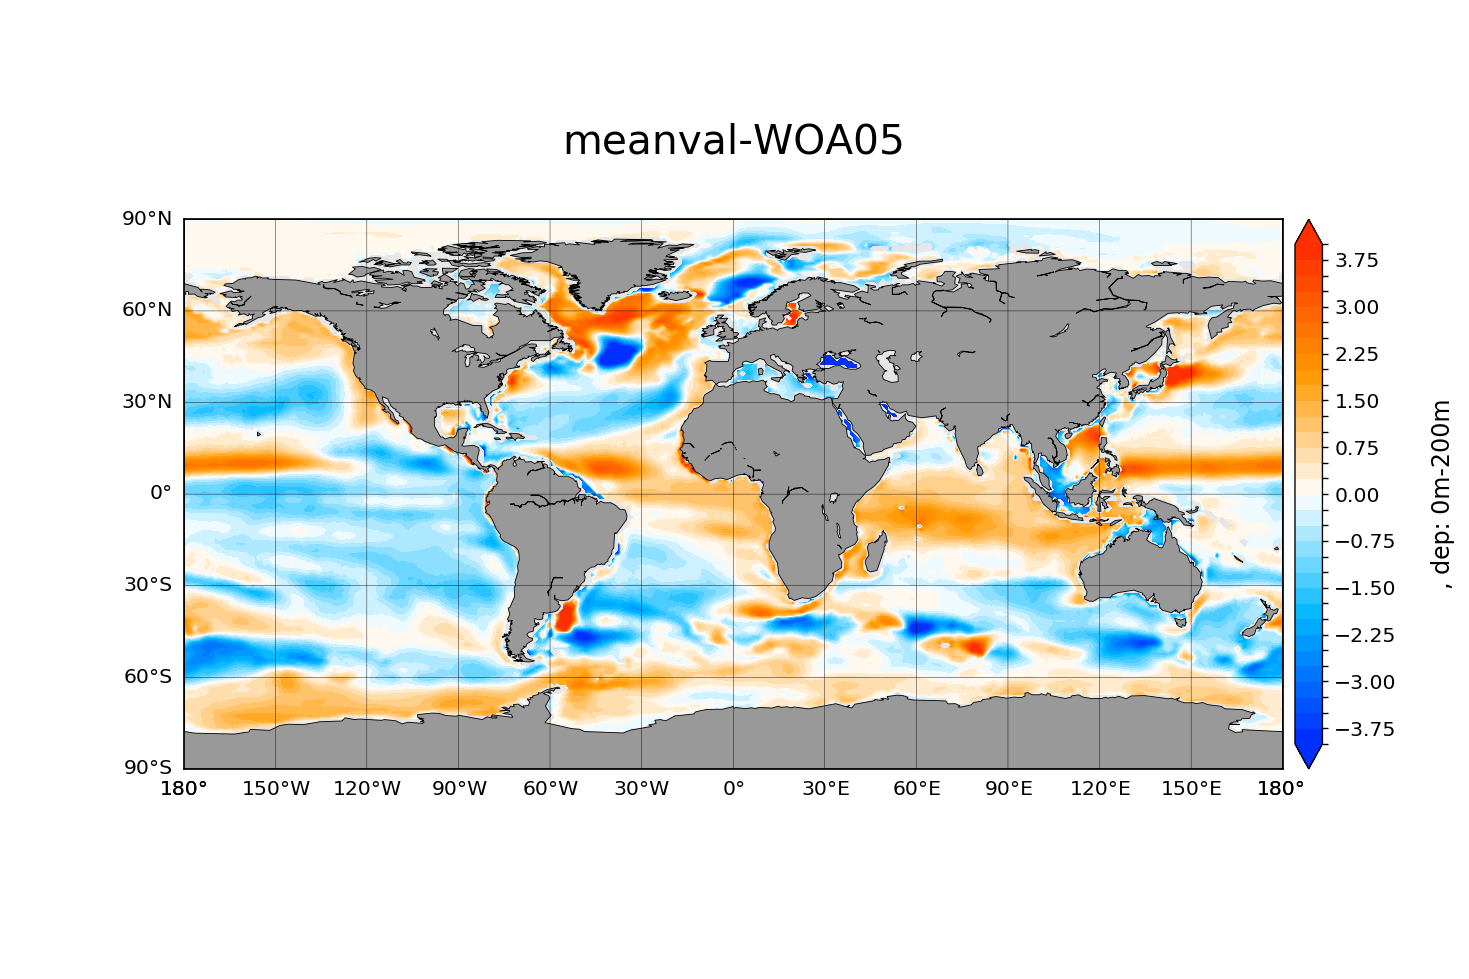

[cmin,cmax,cref] = [-4.0, 4.0, 0.0]
clevel =  [-4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25
 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75
  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75  4.  ]


/home/ollie/pscholz/fvom_ALE_git/view_pscholz/sub_climatology.py:246: RuntimeWarning: invalid value encountered in less
  data_plot[data_plot<clevel[ 0]]  = clevel[ 0]+np.finfo(np.float32).eps
/home/ollie/pscholz/fvom_ALE_git/view_pscholz/sub_climatology.py:247: RuntimeWarning: invalid value encountered in greater
  data_plot[data_plot>clevel[-1]] = clevel[-1]-np.finfo(np.float32).eps


<IPython.core.display.Javascript object>


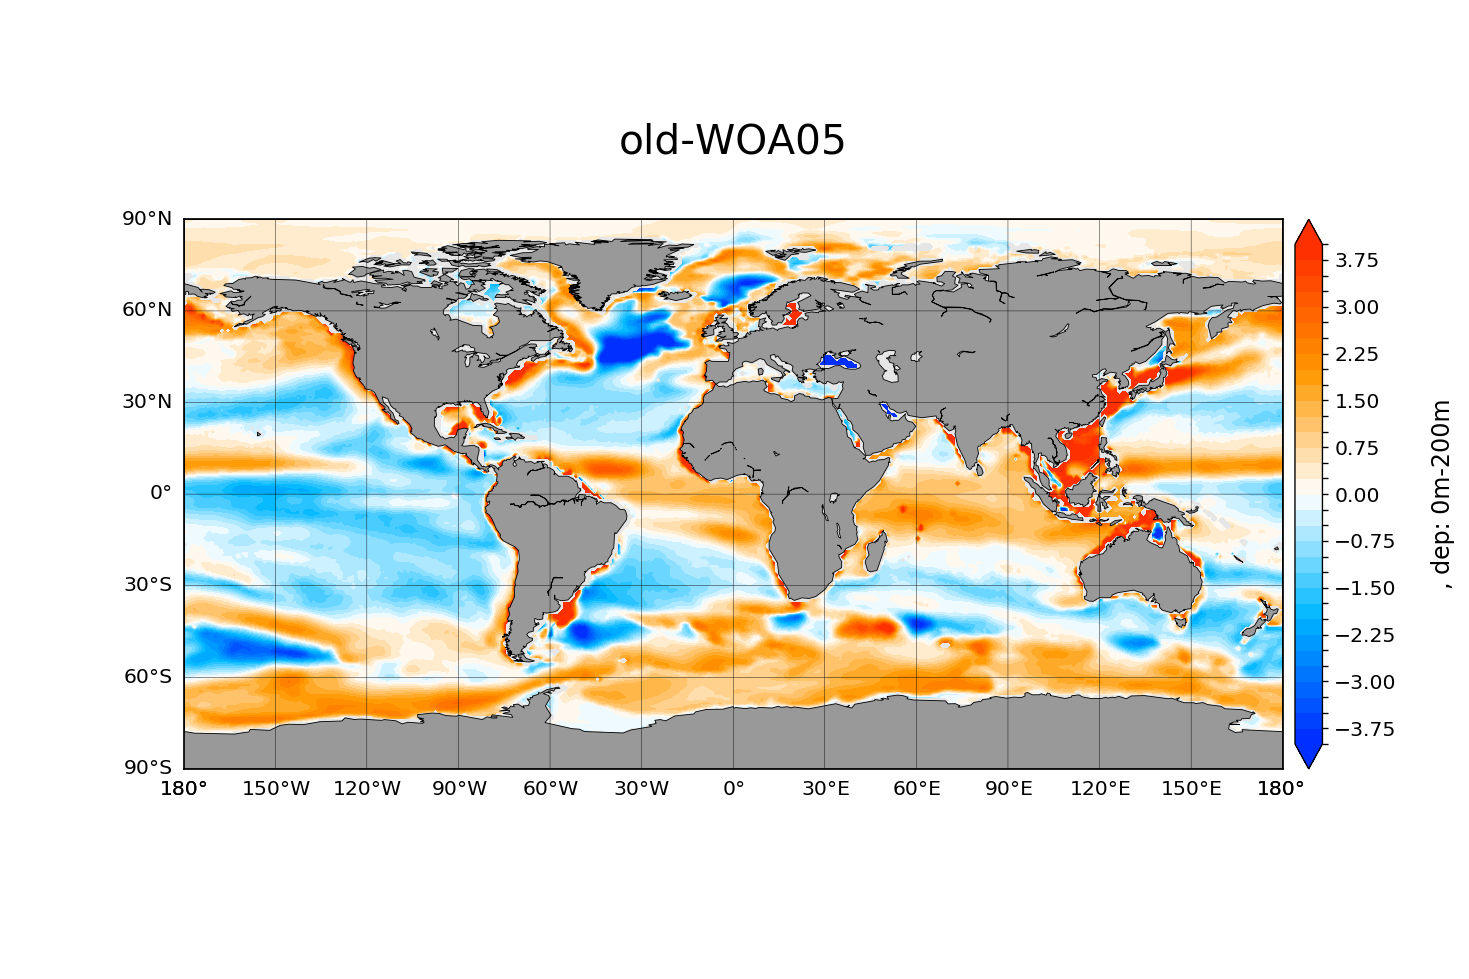

[cmin,cmax,cref] = [-4.0, 4.0, 0.0]
clevel =  [-4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25
 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75
  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75  4.  ]


In [19]:
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** SET INPUT PARAMETER ***                         |
#|                                                                             |
#+_____________________________________________________________________________+
# setup variable name, runid and data path
data 			= fesom_data(inputarray) # init fesom2.0 data object
#data.descript,data.path = 'linfs' , '../results/linfs/withoutPC-2/'
#data.descript,data.path = ' [GM:1,R:1] ', '/work/ollie/dsidoren/results/CORE2/ref/gm_redi_11/3/'
#data.descript,data.path = 'maxval','/work/ollie/pscholz/results_fesom2.0/zstar_pgf/withoutpc/1/'
data.descript,data.path = 'meanval','/work/ollie/pscholz/results_fesom2.0/linfs/zmaxval/3/'
#data.descript,data.path = 'pp' ,'/work/ollie/pscholz/results_fesom2.0/linfs/mixpp/1/'
#data.descript,data.path = 'pp_test' ,'/work/ollie/pscholz/results_fesom2.0/linfs/mixpp_test/1/'
#data.descript,data.path = 'pp_test2' ,'/work/ollie/pscholz/results_fesom2.0/linfs/mixpp_test2/1/'
data.var 		= 'temp'

#+_____________________________________________________________________________+
# select year to average over [start_yr, end_yr]
data.year		= [1998,2007]

# select month to average over
data.month		= [1,2,3,4,5,6,7,8,9,10,11,12]
#data.month		= [1,2,12]
#data.month		= [6,7,8]
#data.month		= [3]

# select linear interpolated depth layers to average over
#data.depth		= [0,10,20,30,40,50,75,100]
data.depth		= np.arange(   0, 200+1,10)
#data.depth		= np.arange( 200, 500+1,20)
#data.depth		= np.arange( 500,1000+1,50)
#data.depth		= np.arange(1000,1500+1,50)

#+_____________________________________________________________________________+
#|                         *** LOAD CLIMATOLOGY ***                            |
#+_____________________________________________________________________________+
path  = '../view/woa2005/'
fname = 'woa2005TS.nc'
clim  = clim_data(path,fname,data.var)
clim.descript = data.descript+'-'+clim.descript
clim.crange,clim.cmap, clim.cnumb      = data.crange,data.cmap, data.cnumb
clim.str_time, clim.str_dep            = data.str_time, data.str_dep
clim.sname, clim.lname, clim.unit      = data.sname, data.lname, data.unit
clim.proj, clim.proj_lon, clim.proj_lat= data.proj, data.proj_lon, data.proj_lat
#+_________________________________________________________________________+
#|  DEFINE FUNCTION: WOA05 CLIMATOLOGY ANOMALY                             |
#+_________________________________________________________________________+
def clim_anom_woa05(clim,data_in):    
    #_____________________________________________________________________
    # calculate anomaly climatology to fesom2.0
    clim_di           = cp.deepcopy(clim)
    # interpolate and average clim data verticaly
    data_clim1        = clim_vinterp(clim_di,data_in.depth)
    # interpolate fesom data horizontalyto climatology grid
    mlon,mlat         = np.meshgrid(clim_di.lon, clim_di.lat)
    clim_di.str_dep   = data_in.str_dep
    distances1, inds1 = create_indexes_and_distances(mesh, mlon, mlat,k=10, n_jobs=2)
    data_fesom1       = fesom2regular(data_in.value, mesh, mlon, mlat, distances=distances1, inds=inds1, radius_of_influence=100000)
    data_fesom1       = data_fesom1.data
    data_fesom1[np.isnan(data_clim1)]=np.nan
    # calc anomaly between fesom and climatology data
    clim_di.anom      = data_fesom1-data_clim1
    clim_di.descript  = data_in.descript+'-'+'WOA05'
    clim_di.cmap      = 'blue2red'
    clim_di.crange    = data_in.crange
    return(clim_di)

#+_____________________________________________________________________________+
#|                         *** LOAD FESOM2.0 DATA ***                          |
#+_____________________________________________________________________________+
if   data.var=='temp': data.crange = [-4.0,4.0,0] # [cmin, cmax, cref]
elif data.var=='salt': data.crange = [-1.0,1.0,0] # [cmin, cmax, cref]
fesom_load_data_horiz(mesh,data,do_output=False)
clim_di = clim_anom_woa05(clim,data)
fig,ax,map,cbar=clim_plot_anom(clim_di)

#data.descript,data.path = 'old','/work/ollie/pscholz/results_fesom2.0/linfs/bad1st_zmaxval_pc0/3/'
#fesom_load_data_horiz(mesh,data,do_output=False)
#clim_di = clim_anom_woa05(clim,data)
#fig,ax,map,cbar=clim_plot_anom(clim_di)
